# 01 - Camera Calibration

## Load and process calibration images

corner not found:  ./camera_cal\calibration01.jpg
corner not found:  ./camera_cal\calibration04.jpg
corner not found:  ./camera_cal\calibration05.jpg


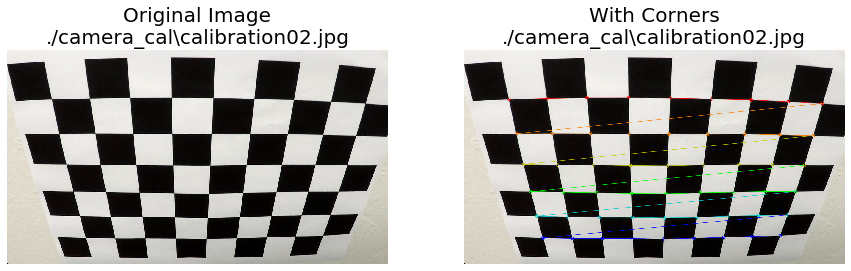

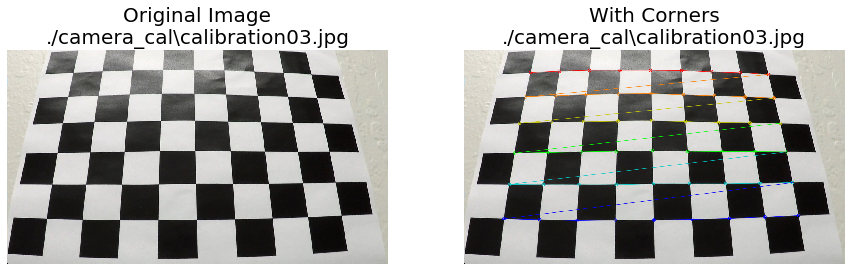

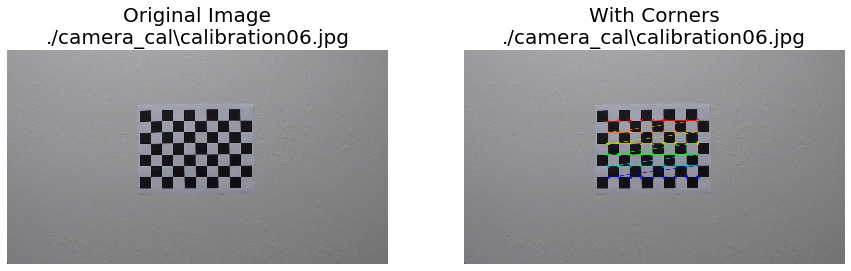

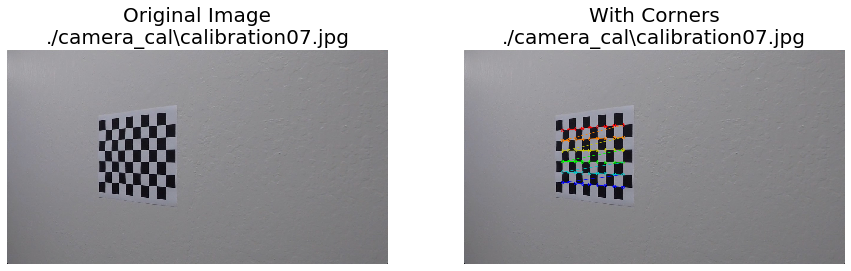

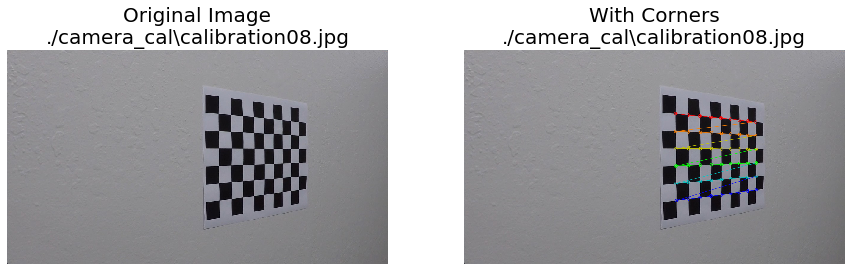

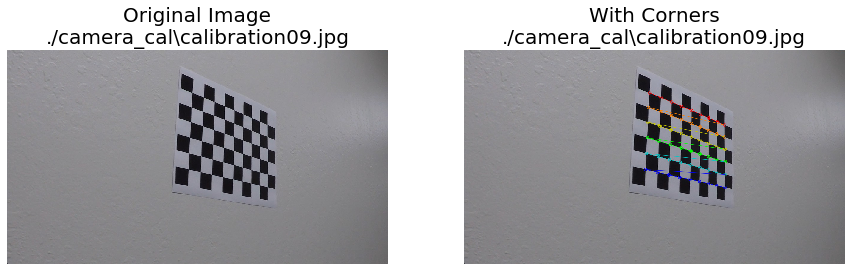

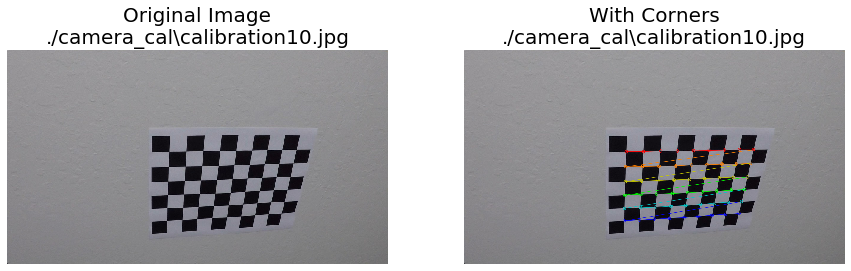

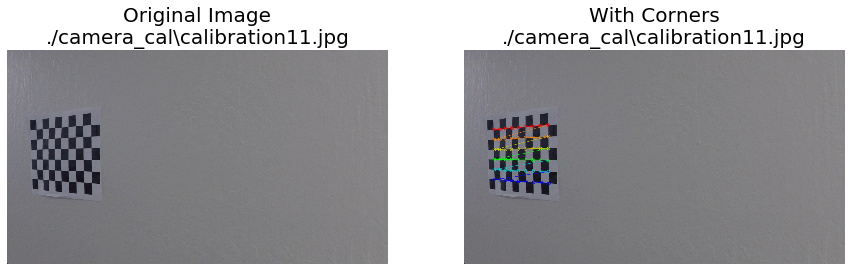

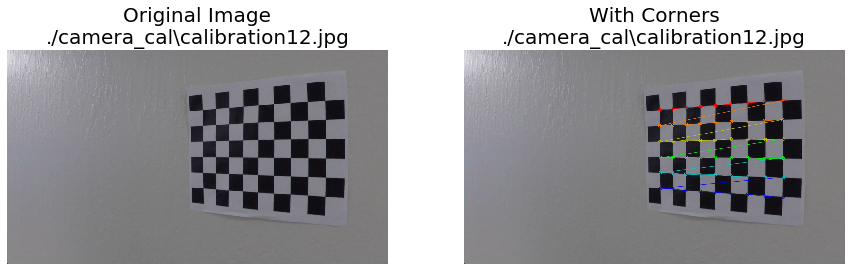

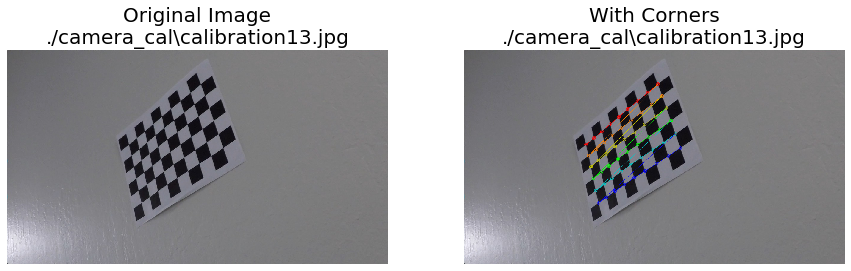

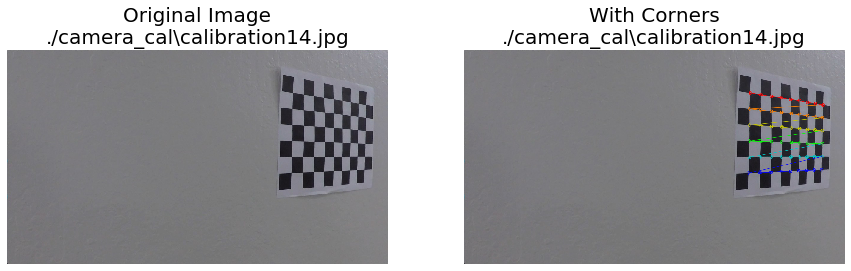

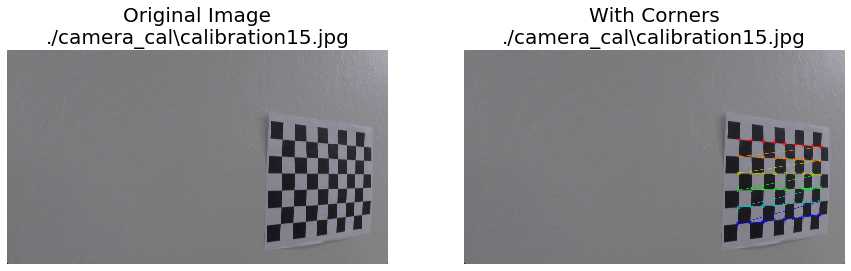

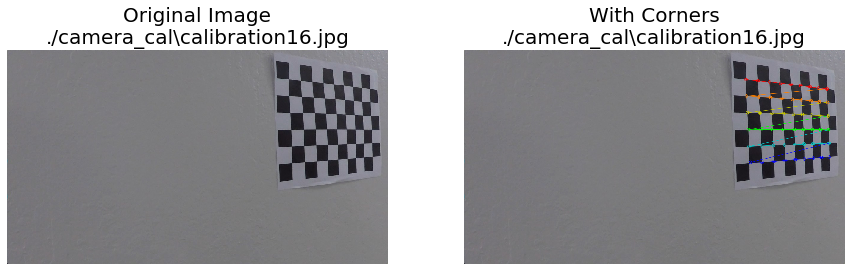

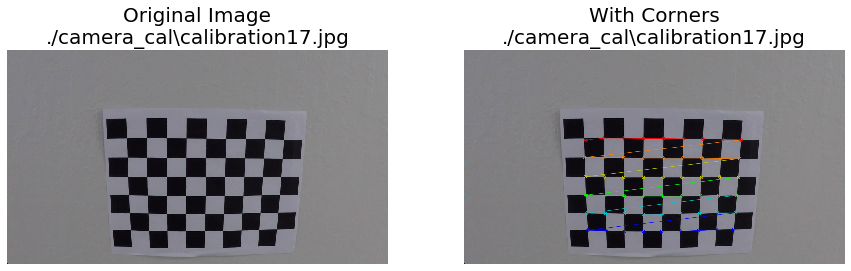

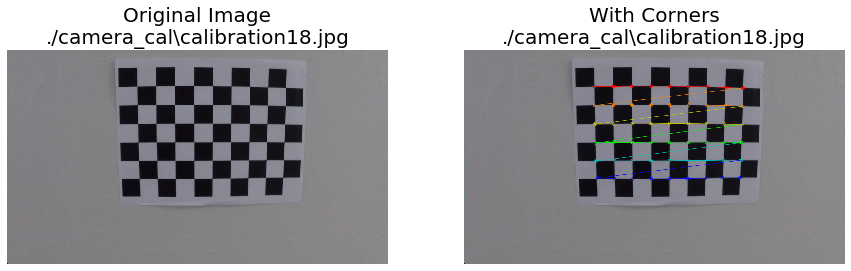

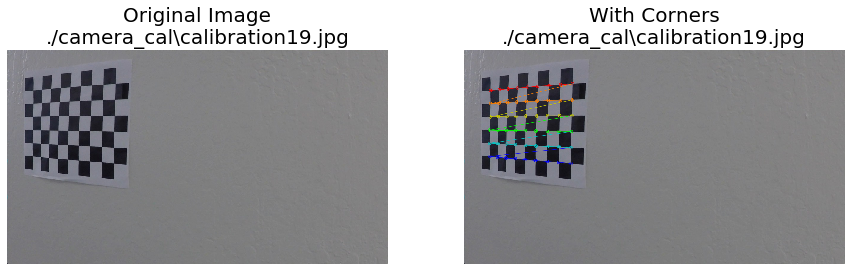

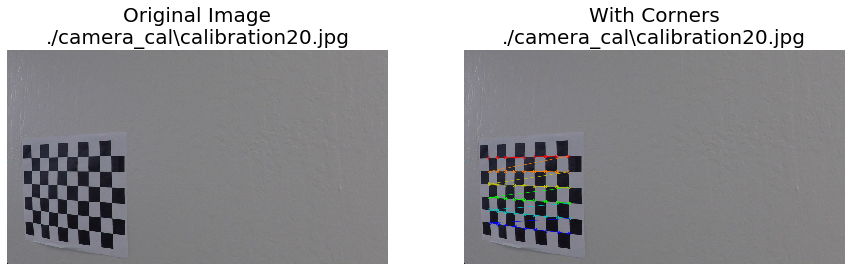

In [1]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# number of corners in x and y direction
nx, ny = 9, 6 

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
fileNames = sorted(glob.glob('./camera_cal/calibration*.jpg'))

# Step through the list and search for chessboard corners
for fileName in fileNames:
    
    # read image from file name
    img = cv2.imread(fileName)
    originalImg = img.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        imgCorners = cv2.drawChessboardCorners(img, (nx,ny), corners, ret)

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,20))
        ax1.imshow(cv2.cvtColor(originalImg, cv2.COLOR_BGR2RGB))
        ax1.set_title('Original Image\n'+ fileName, fontsize=20)
        ax1.axis('off')        
        ax2.imshow(cv2.cvtColor(imgCorners, cv2.COLOR_BGR2RGB))
        ax2.set_title('With Corners\n'+ fileName, fontsize=20)
        ax2.axis('off')        
    else:
        print('corner not found: ', fileName)

## Save calibration results and show undistort example

./camera_calibration.p saved!


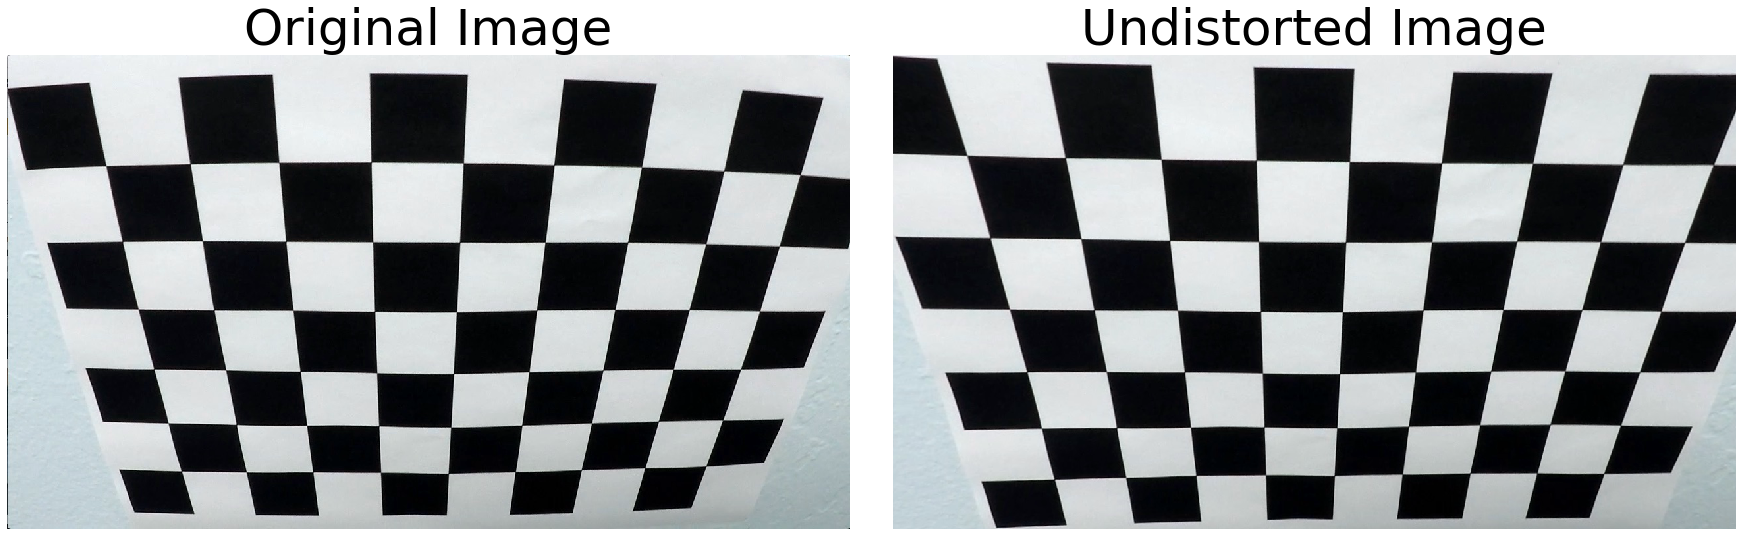

In [2]:
import pickle

# Remove distortion from images
def cal_undistort(img, objpoints, imgpoints, save=False):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[0:2],None,None)
    img = cv2.undistort(img, mtx, dist, None, mtx)
    undist = np.copy(img) 
    if save:
        pickle.dump( { 'mtx': mtx, 'dist': dist }, open('./camera_calibration.p', 'wb'))
        print('./camera_calibration.p saved!')
    return undist

# file name example to undistort
img = cv2.imread(fileNames[1])
undistorted = cal_undistort(img, objpoints, imgpoints, save=True)

# Show undistort example
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
fig.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)
ax1.axis('off')        
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
ax2.axis('off')        
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)